In [1]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from os.path import abspath, join
import sys
from glob import glob
import vaex
from hammer import mond
root_dir = abspath(join('..', '..'))
data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)
from utils import (plot_corner, plot_chain, plot_fit, style, calculate_probs, get_params)

# 2 comp

In [2]:
style()

In [3]:
zfiles = glob(join(root_dir, 'Data', 'Effective-Volume', 'z*.hdf5'))
zfiles.sort()
wfiles = glob(join(root_dir, 'Data', 'Velocity-Distribution', 'w*.hdf5'))
wfiles.sort()
zfiles, wfiles

(['/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(-0.10)_(0.10).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.10)_(0.16).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.16)_(0.20).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.20)_(0.23).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.23)_(0.26).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.26)_(0.28).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.28)_(0.30).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.30)_(0.32).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.32)_(0.34).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.34)_(0.36).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.36)_(0.37).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.37)_(0.39).hdf5',
  '/home2/s20321005/Thesis-Project/Data

In [4]:
index = 0
zfile = zfiles[index]
wfile = wfiles[index]
zdata = vaex.open(zfile)
zmid = zdata['zmid'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['zerr'].to_numpy()

wdata = vaex.open(wfile)
wmid = wdata['wmid'].to_numpy()
wnum = wdata['wnum'].to_numpy()
werr = wdata['werr'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [13]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
mu0 = [0.5]
log_nu0 = [0]
R = [3.4E-3]
zsun = [20]
w0 = [-7.]
log_sigmaw1 = [np.log(5.)]
log_a1 = [np.log(1.)]
log_sigmaw2 = [np.log(10.)]
log_a2 = [np.log(0.2)]

theta = np.array([rhob + sigmaz + mu0 + log_nu0 + R + zsun+w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(33,)

In [7]:
locs = dict(
    mu0=0.1,
    log_nu0=-1,
    R=3.4E-3,
    zsun=-50,
    w0=-15,
    log_sigmaw1=np.log(1),
    log_a1=np.log(0.05),
    log_sigmaw2=np.log(1),
    log_a2=np.log(0.05),
)

scales = dict(
    mu0=5.9,
    log_nu0=3,
    R=0.6E-3,
    zsun=100,
    w0=15,
    log_sigmaw1=np.log(25)-locs['log_sigmaw1'],
    log_a1=np.log(2)-locs['log_a1'],
    log_sigmaw2=np.log(25)-locs['log_sigmaw2'],
    log_a2=np.log(2)-locs['log_a2'],
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('mu0', 0.1, 0.5, 6.0),
 ('log_nu0', -1.0, 1.0, 2.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 20.0, 50.0),
 ('w0', -15.0, -7.0, 0.0),
 ('log_sigmaw1', 0.0, 1.6094379124341003, 3.2188758248682006),
 ('log_a1', -2.995732273553991, 0.0, 0.6931471805599454),
 ('log_sigmaw2', 0.0, 2.302585092994046, 3.2188758248682006),
 ('log_a2', -2.995732273553991, -1.6094379124341003, 0.6931471805599454)]

In [8]:
ndim = len(locs)+24
nwalkers = 2*ndim+2
ndim, nwalkers

(33, 68)

In [9]:
p0 = mond.generate_p0(nwalkers, locs, scales, kind=2)
p0.shape

(68, 33)

In [10]:
for p in p0:
    print(mond.log_prob(p, zdata, wdata, locs, scales))

(38.30913622253218, -354.494565661338)
(43.1156277358329, -1098.9158548357798)
(34.75695200624818, -4578.42893049425)
(42.472560425475045, -7844.979952329553)
(40.1946184606876, -2566.125847162464)
(41.93723757522808, -1068.9543432626092)
(37.721133218596826, -5316.564161430482)
(45.87875028817029, -6477.294963583206)
(47.8451711689316, -9132.917619834272)
(42.418882459066104, -406.4341855641413)
(45.48521483016413, -7305.99910012646)
(43.98634335635385, -9586.001243444774)
(40.70888352236614, -15921.546084383826)
(36.3097460992045, -3923.4591867392814)
(44.31772883607452, -149.7198897098674)
(35.471149839473426, -94.29198127019403)
(37.89960467281411, -25320.52572783541)
(45.63322410872576, -6308.6819019849645)
(44.48012920181746, -186.0636111757326)
(39.5379592049464, -190.2605944819138)
(35.42797366553039, -5215.524888407031)
(38.564898049153356, -5848.1126054339475)
(45.6251145339911, -7248.485106475617)
(36.286258036900755, -303.2079251670322)
(41.81941734185311, -14266.5783160230

In [11]:
p0_flat = p0.reshape(-1, ndim)
mond.log_prob_par(p0_flat, zdata, wdata, locs, scales)

array([[ 3.83091362e+01, -3.92803702e+02, -3.54494566e+02],
       [ 4.31156277e+01, -1.14203148e+03, -1.09891585e+03],
       [ 3.47569520e+01, -4.61318588e+03, -4.57842893e+03],
       [ 4.24725604e+01, -7.88745251e+03, -7.84497995e+03],
       [ 4.01946185e+01, -2.60632047e+03, -2.56612585e+03],
       [ 4.19372376e+01, -1.11089158e+03, -1.06895434e+03],
       [ 3.77211332e+01, -5.35428529e+03, -5.31656416e+03],
       [ 4.58787503e+01, -6.52317371e+03, -6.47729496e+03],
       [ 4.78451712e+01, -9.18076279e+03, -9.13291762e+03],
       [ 4.24188825e+01, -4.48853068e+02, -4.06434186e+02],
       [ 4.54852148e+01, -7.35148431e+03, -7.30599910e+03],
       [ 4.39863434e+01, -9.62998759e+03, -9.58600124e+03],
       [ 4.07088835e+01, -1.59622550e+04, -1.59215461e+04],
       [ 3.63097461e+01, -3.95976893e+03, -3.92345919e+03],
       [ 4.43177288e+01, -1.94037619e+02, -1.49719890e+02],
       [ 3.54711498e+01, -1.29763131e+02, -9.42919813e+01],
       [ 3.78996047e+01, -2.53584253e+04

(33,)


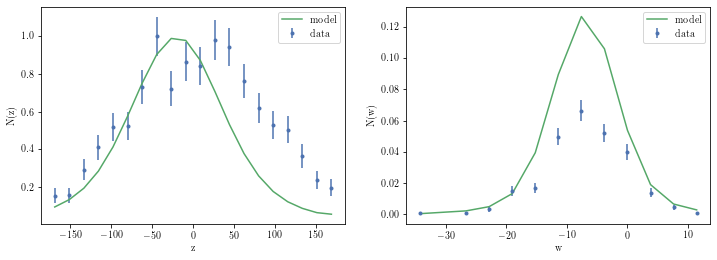

(52.85639686831882, -94.0344446955823)

In [14]:
print(theta.shape)
zmod = mond.fz(zmid, theta)
wmod = mond.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
mond.log_prob(theta, zdata, wdata, locs, scales)

In [15]:
t0 = time()
chain = mond.mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

3.8424081802368164 s


(500, 68, 33)

In [17]:
calculate_probs(mond, chain, ndim, zdata, wdata, locs, scales, batch=100)

array([[   40.28373899,  -359.1792325 ,  -318.89549351],
       [   43.11562774, -1142.03148257, -1098.91585484],
       [   34.75695201, -4613.1858825 , -4578.42893049],
       ...,
       [   36.28449641,    77.39310026,   113.67759667],
       [   45.65470839,    79.39093306,   125.04564145],
       [   40.53645919,    78.21811826,   118.75457745]])

100%|██████████| 10/10 [00:00<00:00, 28.48it/s]


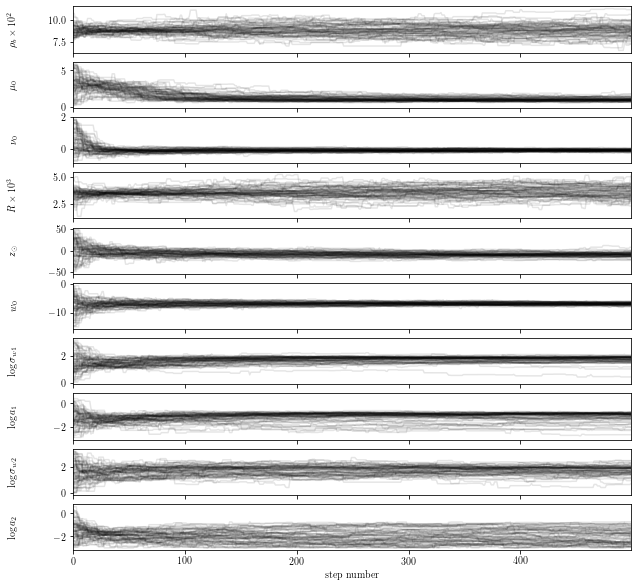

In [18]:
labels = [r'$\rho_b\times 10^2$', r'$\mu_0$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob', 'mu0', 'log_nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31, 32]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

In [19]:
p0_next = chain[-1, :, :]
t0 = time()
chain = mond.mcmc(2000, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

13.152663230895996 s


(2000, 68, 33)

100%|██████████| 10/10 [00:00<00:00, 27.04it/s]


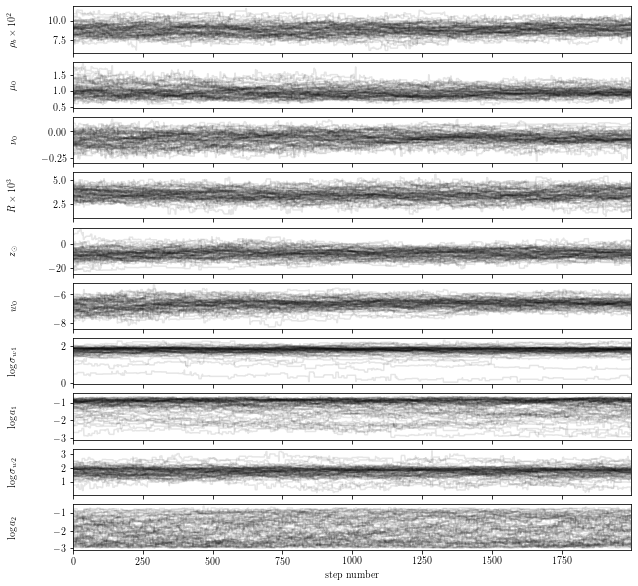

In [20]:
labels = [r'$\rho_b\times 10^2$', r'$\mu_0$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob', 'mu0', 'log_nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31, 32]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

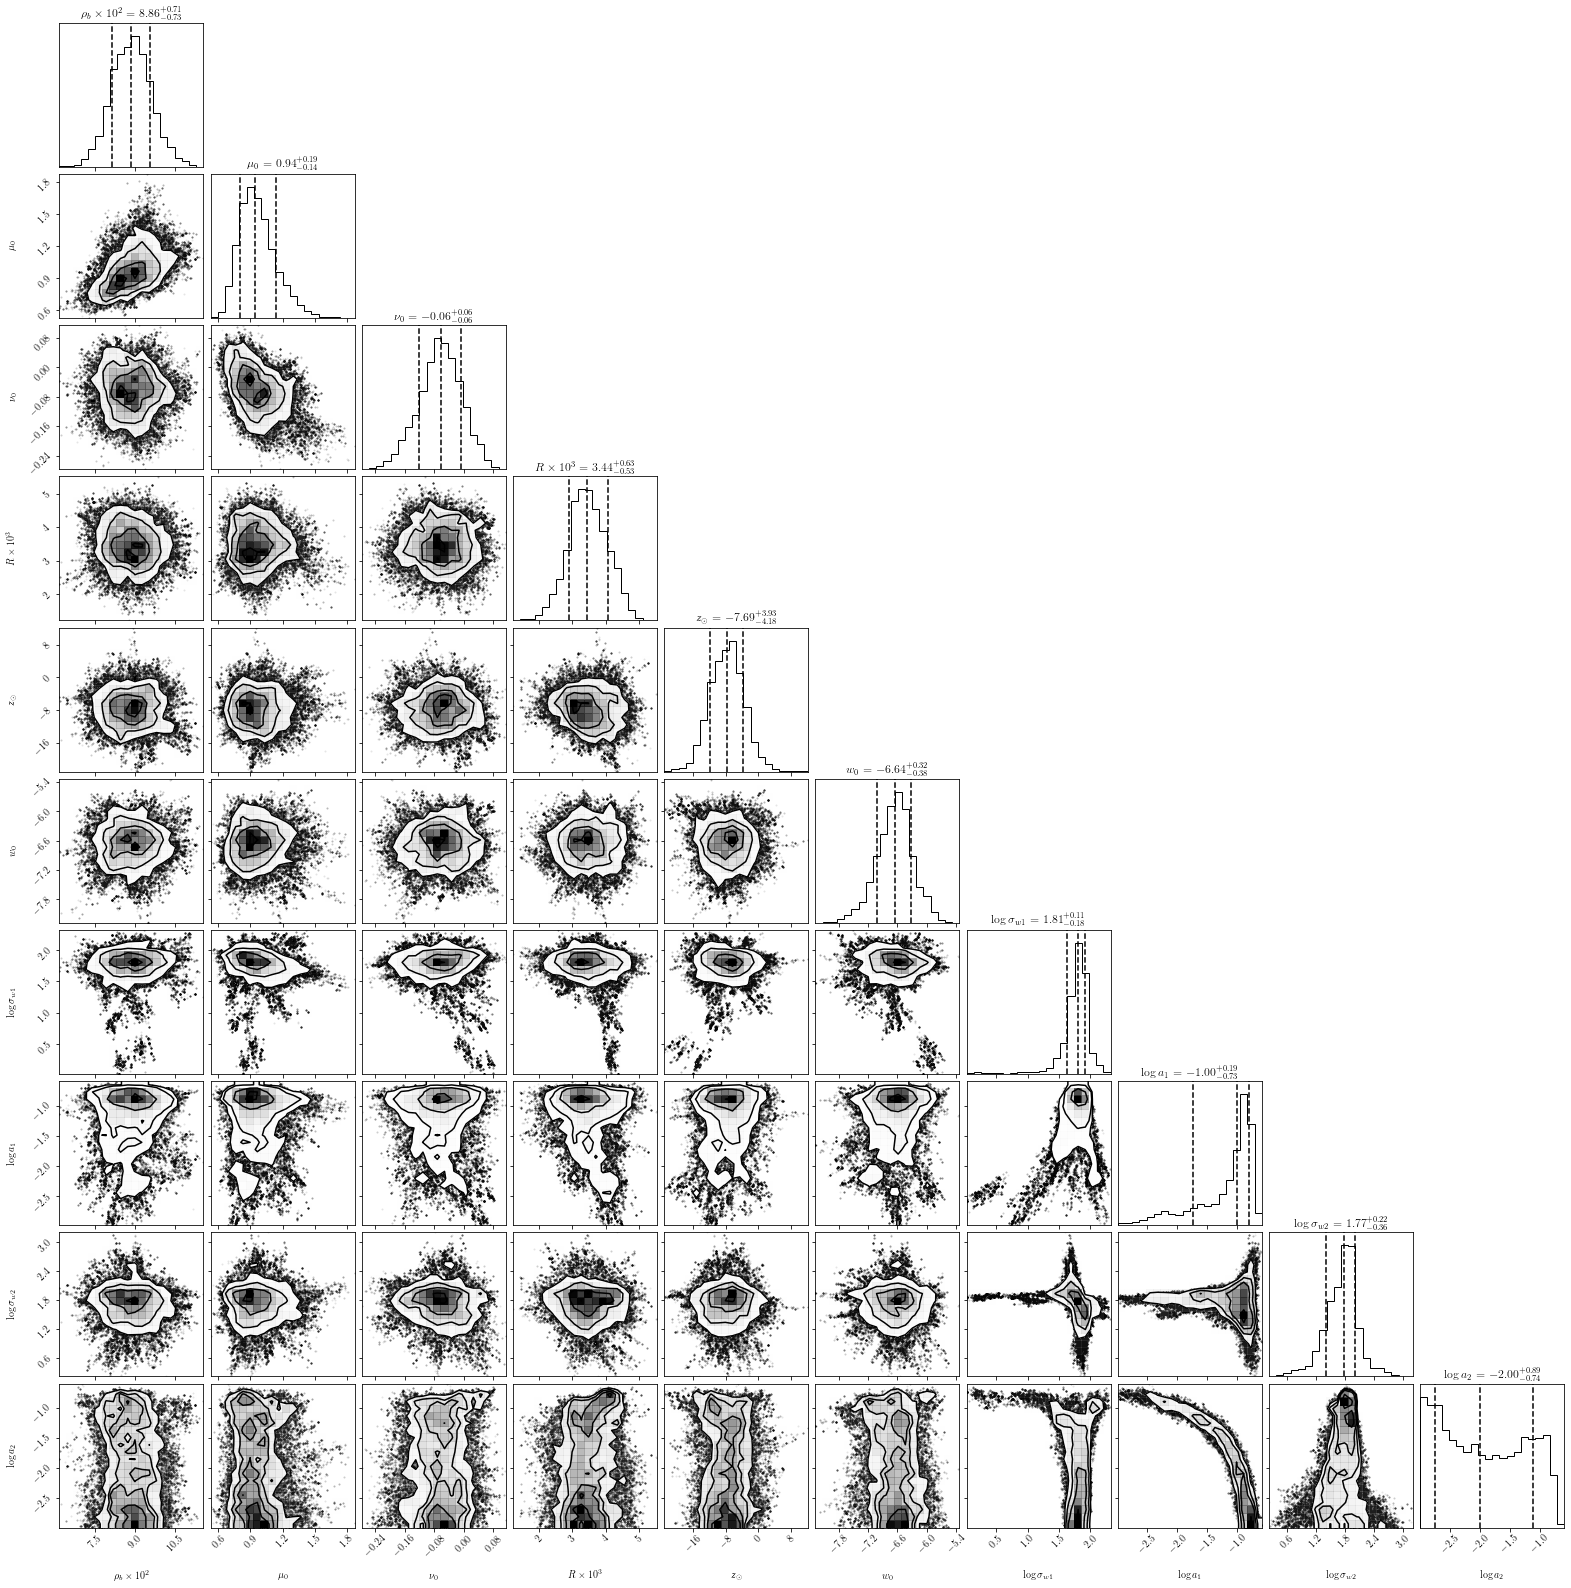

In [21]:
plot_corner(params, labels)

(136000, 33)


100%|██████████| 50000/50000 [00:30<00:00, 1653.58it/s]


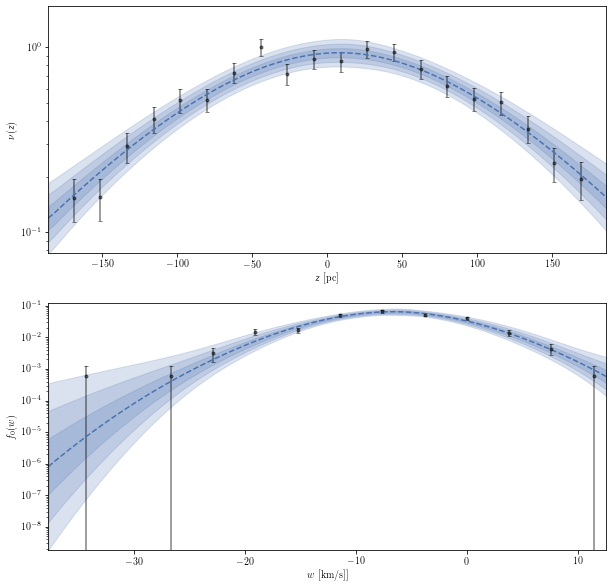

In [22]:
plot_fit(mond, zdata, wdata, chain, ndim)

In [23]:
probs = calculate_probs(mond, chain, ndim, zdata, wdata, locs, scales)

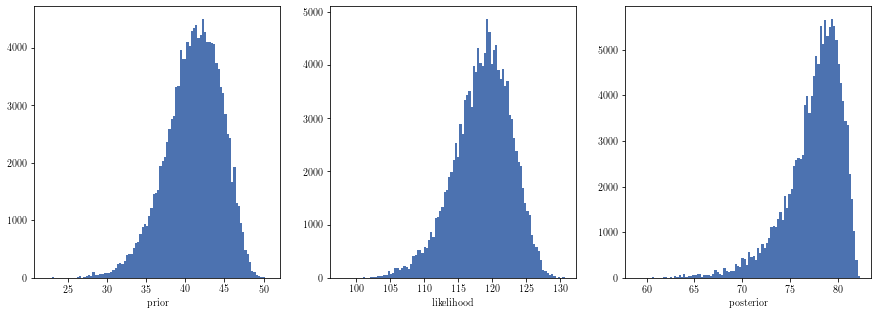

130.66268262177257

In [24]:
prior = probs[:, 0]
likelihood = probs[:, 2]
posterior = probs[:, 1]
# plot histogram of probabilities
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(prior, bins=100)
axes[0].set_xlabel('prior')
axes[1].hist(likelihood, bins=100)
axes[1].set_xlabel('likelihood')
axes[2].hist(posterior, bins=100)
axes[2].set_xlabel('posterior')
plt.show()
likelihood.max()

# educated initial guess!?!

check 1_mock_dm

# Script

do mcmc for

* same $N$, different $z$
* same $z$, different $N$

Each 'running' contains
1. generate_init: initial position for walkers.
    * this is done by the experiment above.
2. run_mcmc: run true mcmc for 10_000 steps.
3. plot trace: plot trace plot for preliminary mcmc.
4. plot corner: plot corner plot for the long run.
5. plot fit: fitting plot for vertical density and vertical dispersion.
6. calculate bic & aic: calculate bic and aic for the long run.

All of these functionalities are implemented in `mcmc.py` at `utils`.

Just run the `program.py` at `script`.
To automate the process for all data, run `run_program.py` at `script`.

# Mock comparison

run mcmc but now for mock data comparison.

`Data/MCMC/dm_mock/mock/comp`

It contains mock data with different number of data points.
1000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000

This comparison is done to see the prediction power of the model.

In [25]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from os.path import abspath, join
import sys
from glob import glob
import vaex
from hammer import mond
root_dir = abspath(join('..', '..'))
data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)

In [26]:
from utils import style, calculate_probs, plot_chain, plot_corner, plot_fit, get_params

style()

In [27]:
zfiles = glob(join(root_dir, 'Data', 'MCMC', 'dm_mock', 'mock', 'comp', 'z*.hdf5'))
zfiles.sort()
wfiles = glob(join(root_dir, 'Data', 'MCMC', 'dm_mock', 'mock', 'comp','w*.hdf5'))
wfiles.sort()
zfiles, wfiles

(['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_1000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_10000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_100000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_1000000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_5000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_50000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_500000.hdf5'],
 ['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_1000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_10000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_100000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_1000000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_5000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/co

In [28]:
index = 0
zfile = zfiles[index]
wfile = wfiles[index]
zdata = vaex.open(zfile)
zmid = zdata['zmid'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['zerr'].to_numpy()

wdata = vaex.open(wfile)
wmid = wdata['wmid'].to_numpy()
wnum = wdata['wnum'].to_numpy()
werr = wdata['werr'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [29]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
mu0 = [0.5]
log_nu0 = [0]
R = [3.4E-3]
zsun = [20]
w0 = [-7.]
log_sigmaw1 = [np.log(5.)]
log_a1 = [np.log(1.)]
log_sigmaw2 = [np.log(10.)]
log_a2 = [np.log(0.2)]

theta = np.array([rhob + sigmaz + mu0 + log_nu0 + R + zsun+w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(33,)

In [30]:
locs = dict(
    mu0=0.1,
    log_nu0=-1,
    R=3.4E-3,
    zsun=-50,
    w0=-15,
    log_sigmaw1=np.log(1),
    log_a1=np.log(0.05),
    log_sigmaw2=np.log(1),
    log_a2=np.log(0.05),
)

scales = dict(
    mu0=5.9,
    log_nu0=3,
    R=0.6E-3,
    zsun=100,
    w0=15,
    log_sigmaw1=np.log(25)-locs['log_sigmaw1'],
    log_a1=np.log(2)-locs['log_a1'],
    log_sigmaw2=np.log(25)-locs['log_sigmaw2'],
    log_a2=np.log(2)-locs['log_a2'],
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('mu0', 0.1, 0.5, 6.0),
 ('log_nu0', -1.0, 0.0, 2.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 20.0, 50.0),
 ('w0', -15.0, -7.0, 0.0),
 ('log_sigmaw1', 0.0, 1.6094379124341003, 3.2188758248682006),
 ('log_a1', -2.995732273553991, 0.0, 0.6931471805599454),
 ('log_sigmaw2', 0.0, 2.302585092994046, 3.2188758248682006),
 ('log_a2', -2.995732273553991, -1.6094379124341003, 0.6931471805599454)]

(33,)


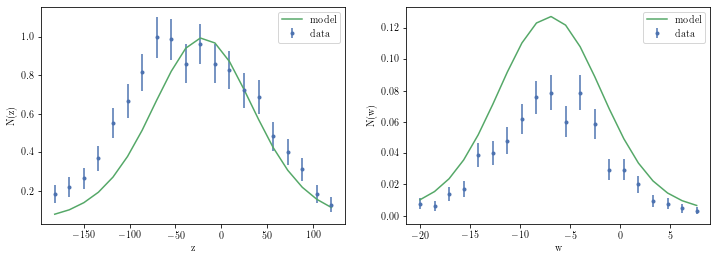

(52.85639686831882, -0.18210641043248188)

In [31]:
print(theta.shape)
zmod = mond.fz(zmid, theta)
wmod = mond.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
mond.log_prob(theta, zdata, wdata, locs, scales)

In [32]:
ndim = len(locs)+24
nwalkers = 2*ndim+2
ndim, nwalkers

(33, 68)

In [33]:
p0 = mond.generate_p0(nwalkers, locs, scales, kind=2)
p0.shape

(68, 33)

In [11]:
p0_flat = p0.reshape(-1, ndim)
mond.log_prob_par(p0_flat, zdata, wdata, locs, scales)

array([[ 4.34744695e+01, -1.03063859e+03, -9.87164117e+02],
       [ 4.26104693e+01, -3.75659042e+02, -3.33048573e+02],
       [ 3.51788396e+01, -7.05781212e+03, -7.02263328e+03],
       [ 4.46871218e+01, -5.39391214e+02, -4.94704092e+02],
       [ 4.43133628e+01, -2.28883902e+03, -2.24452566e+03],
       [ 4.05914353e+01, -1.42994828e+03, -1.38935685e+03],
       [ 3.80349543e+01, -1.47107161e+02, -1.09072206e+02],
       [ 4.22482920e+01, -2.63822829e+02, -2.21574537e+02],
       [ 3.54708842e+01, -2.31135246e+04, -2.30780537e+04],
       [ 4.19520926e+01, -1.03807731e+03, -9.96125221e+02],
       [ 4.46438530e+01, -2.10435484e+02, -1.65791632e+02],
       [ 3.53234881e+01, -4.22334990e+03, -4.18802641e+03],
       [ 4.15308345e+01, -1.01778666e+04, -1.01363357e+04],
       [ 4.14061593e+01, -8.59980916e+03, -8.55840300e+03],
       [ 4.33281224e+01, -2.73289913e+03, -2.68957101e+03],
       [ 4.08087694e+01, -8.17787330e+03, -8.13706453e+03],
       [ 4.09950456e+01, -1.61735344e+03

In [34]:
t0 = time()
chain = mond.mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

4.492062091827393 s


(500, 68, 33)

In [13]:
calculate_probs(mond, chain, ndim, zdata, wdata, locs, scales, batch=100)

array([[   44.57174918,  -759.3396411 ,  -714.76789192],
       [   42.61046932,  -375.65904243,  -333.04857311],
       [   35.17883963, -7057.81211632, -7022.63327669],
       ...,
       [   45.5281166 ,   101.75112554,   147.27924215],
       [   46.14243919,    99.84962405,   145.99206324],
       [   40.5243795 ,    94.26271193,   134.78709144]])

100%|██████████| 10/10 [00:00<00:00, 43.50it/s]


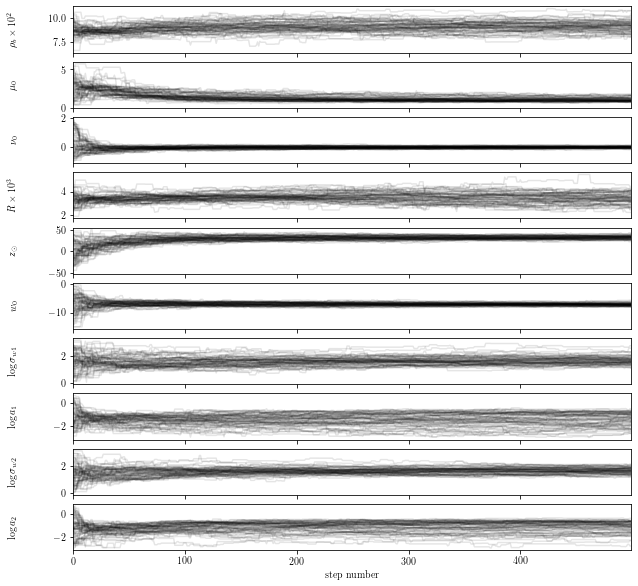

In [35]:
labels = [r'$\rho_b\times 10^2$', r'$\mu_0$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob', 'mu0', 'log_nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31, 32]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

In [36]:
p0_next = chain[-1, :, :]
t0 = time()
chain = mond.mcmc(2000, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

15.08505129814148 s


(2000, 68, 33)

100%|██████████| 10/10 [00:00<00:00, 27.08it/s]


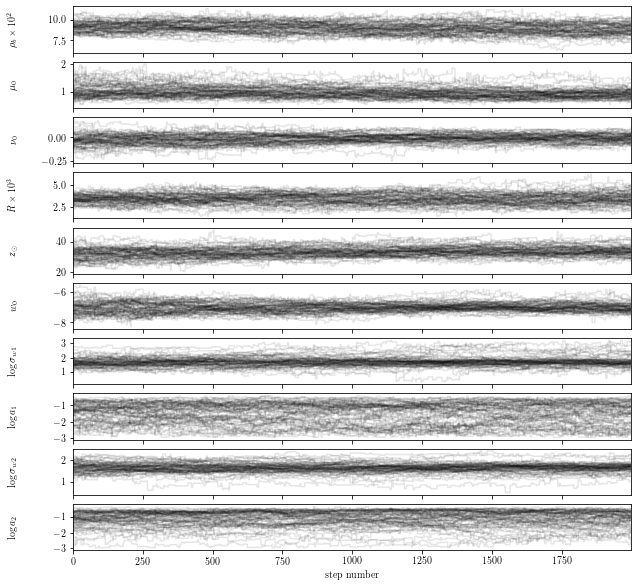

In [37]:
labels = [r'$\rho_b\times 10^2$', r'$\mu_0$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob', 'mu0', 'log_nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31, 32]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

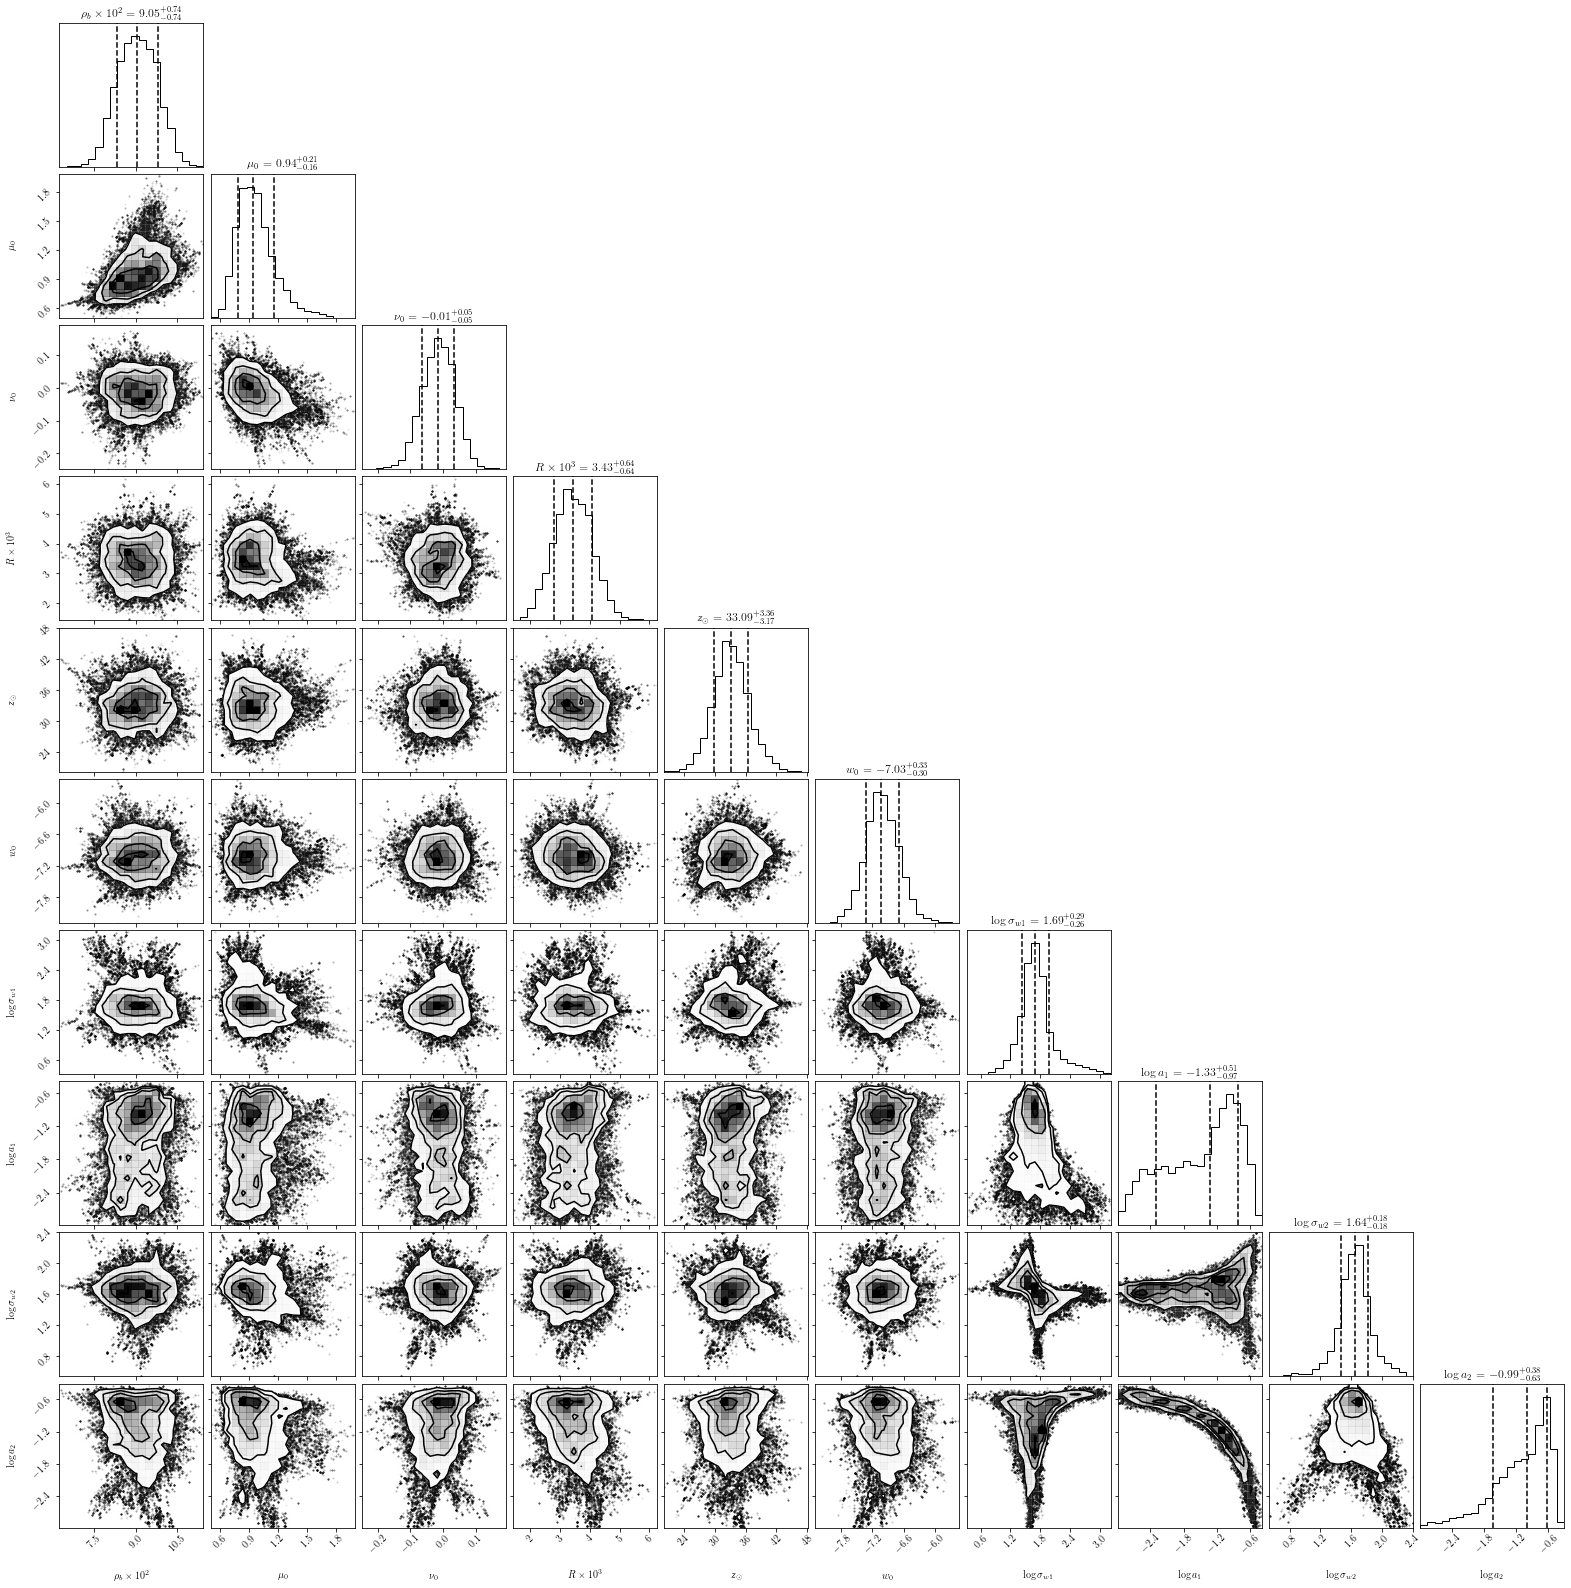

In [38]:
plot_corner(params, labels)

(136000, 33)


100%|██████████| 50000/50000 [00:35<00:00, 1400.84it/s]


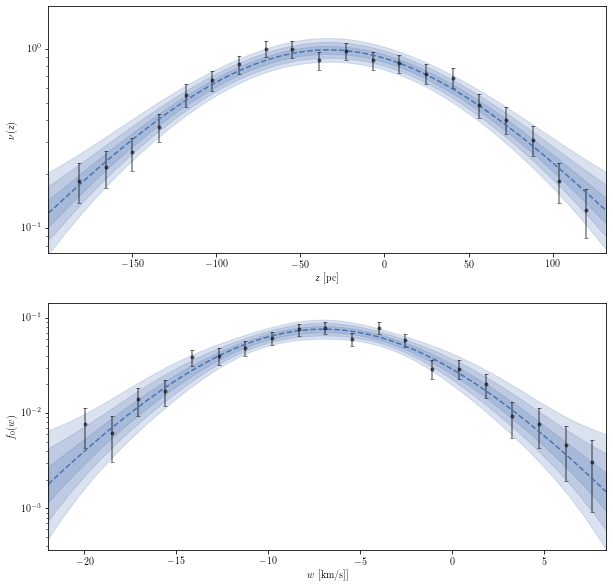

In [39]:
plot_fit(mond, zdata, wdata, chain, ndim)

In [40]:
probs = calculate_probs(mond, chain, ndim, zdata, wdata, locs, scales)

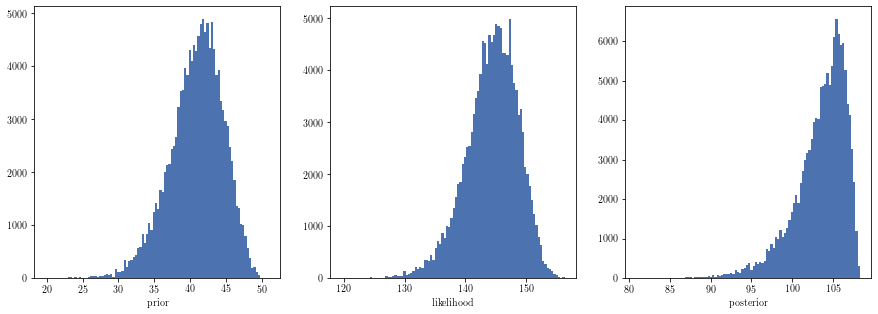

156.28114101163612

In [41]:
prior = probs[:, 0]
likelihood = probs[:, 2]
posterior = probs[:, 1]
# plot histogram of probabilities
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(prior, bins=100)
axes[0].set_xlabel('prior')
axes[1].hist(likelihood, bins=100)
axes[1].set_xlabel('likelihood')
axes[2].hist(posterior, bins=100)
axes[2].set_xlabel('posterior')
plt.show()
likelihood.max()

The script for comparing also implemented in `script` folder.